In [82]:
import pandas as pd 
import numpy as np
import sklearn as sk
from sklearn import tree
import seaborn as sns

#import библиотек настройка окружения

In [40]:
data = pd.read_csv('SpotifyFeatures.csv')
#загрузка датасета

#### Подготовка и анлиз датасета

In [41]:
data.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [43]:
data['genre'].value_counts()

Comedy              9681
Soundtrack          9646
Indie               9543
Jazz                9441
Pop                 9386
Electronic          9377
Children’s Music    9353
Folk                9299
Hip-Hop             9295
Rock                9272
Alternative         9263
Classical           9256
Rap                 9232
World               9096
Soul                9089
Blues               9023
R&B                 8992
Anime               8936
Reggaeton           8927
Ska                 8874
Reggae              8771
Dance               8701
Country             8664
Opera               8280
Movie               7806
Children's Music    5403
A Capella            119
Name: genre, dtype: int64

In [44]:
# вычленение целевой переменной
y = data['popularity']
data.drop(['popularity'], axis=1).head()

,genre,artist_name,track_name,track_id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [45]:
from sklearn.model_selection import train_test_split 


In [96]:
data['genre'] = pd.factorize(data.genre)[0]
data['artist_name'] = pd.factorize(data.artist_name)[0]
data['key'] = pd.factorize(data.key)[0]
data['key'] = pd.factorize(data.key)[0]
data['mode'] = pd.factorize(data['mode'])[0]
#избавление от сильно сколерриванных (независимых) переменных - названий треков, ключей
# преобразование str формата строк в инт 

In [64]:
data.head()

,genre,artist_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,0,0,0,0.611,0.389,99373,0.910,0.000,0,0.3460,-1.828,0,0.0525,166.969,0.814
1,0,1,1,0.246,0.590,137373,0.737,0.000,1,0.1510,-5.559,1,0.0868,174.003,0.816
2,0,2,3,0.952,0.663,170267,0.131,0.000,2,0.1030,-13.879,1,0.0362,99.488,0.368
3,0,0,0,0.703,0.240,152427,0.326,0.000,0,0.0985,-12.178,0,0.0395,171.758,0.227
4,0,3,4,0.950,0.331,82625,0.225,0.123,3,0.2020,-21.150,0,0.0456,140.576,0.390


In [65]:
from sklearn.model_selection import train_test_split

In [66]:
data_train, data_test, y_train, y_test = train_test_split(data, y, test_size=0.33, random_state=42)
# разбиение на тренировчоный и тестовый

In [67]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [68]:
clf.fit(data_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [69]:
clf.score(data_test, y_test)

0.9999869791666667

In [87]:
from sklearn.model_selection import cross_val_score
scores_data = pd.DataFrame()
max_depth_value = range(1, 15)
for max_depth in max_depth_value:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(data_train, y_train)
    train_score = clf.score(data_train, y_train)
    test_score = clf.score(data_test, y_test)
    
    mean_cross_val = cross_val_score(clf, data_train, y_train, cv=2).mean()
    
    temp_scores_data = pd.DataFrame({'max_depth':[max_depth], 'train_score':[train_score],
                                     'test_scores':[test_score],
                                    'cross_val':[mean_cross_val]})

    
    scores_data = scores_data.append(temp_scores_data)

# зависимость скора на тренировочном, кросс-вал, тестовой выборке от глубины дерева

C:\Users\Anton Zakharov\AppData\Local\Temp\ipykernel_2544\3193972250.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_scores_data)
C:\Users\Anton Zakharov\AppData\Local\Temp\ipykernel_2544\3193972250.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_scores_data)
C:\Users\Anton Zakharov\AppData\Local\Temp\ipykernel_2544\3193972250.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_scores_data)
C:\Users\Anton Zakharov\AppData\Local\Temp\ipykernel_2544\3193972250.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sco

In [88]:
scores_data.head()

,max_depth,train_score,test_scores,cross_val
0,1,0.050659,0.049844,0.050659
0,2,0.091095,0.088438,0.091095
0,3,0.162950,0.162799,0.162950
0,4,0.290588,0.290807,0.290588
0,5,0.542299,0.541875,0.542299


In [93]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_scores', 'cross_val']
                           ,value_name='myVarname', var_name='Scores')
scores_data_long.head()

,max_depth,Scores,myVarname
0,1,train_score,0.050659
1,2,train_score,0.091095
2,3,train_score,0.162950
3,4,train_score,0.290588
4,5,train_score,0.542299


<AxesSubplot:xlabel='max_depth', ylabel='myVarname'>

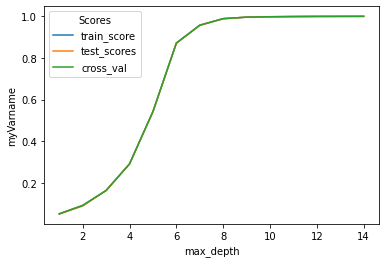

In [97]:
sns.lineplot(data=scores_data_long, x="max_depth", y="myVarname", hue="Scores")
# графическая интерпритация полученных данных